# Load Libraries

In [75]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from scipy.stats import norm

# Read Data

In [76]:
data = 'Brazil_1996PNAD.out'

# drop observations with 0 earnings
df = pd.read_csv(data, sep='\t', encoding='utf-8')\
    .query('MONTHLY_EARNINGS != 0')\
    .assign(log_earnings=lambda x: np.log(x.MONTHLY_EARNINGS))

# 1a

In [77]:
reg = smf.ols('log_earnings ~ YRSSCH + AgeInDays + np.power(AgeInDays, 2)', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_earnings   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                 1.904e+04
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:01:29   Log-Likelihood:                -77088.
No. Observations:               66506   AIC:                         1.542e+05
Df Residuals:                   66502   BIC:                         1.542e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.8243      0.021    137.350      0.000       2.784       2.865
YRSSCH                     0.1459      0.001    196.232      0.000       0.144       0.147
AgeInDays                  0.0979      0.001     89.456      0.000       0.096       0.100
np.power(AgeInDays, 2)    -0.0010   1.33e-05    -73.097      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1540.444   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3390.926
Skew:                           0.091   Prob(JB):                         0.00
Kurtosis:                       4.091   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 1b

In [78]:
reg2 = smf.ols('log_earnings ~ C(YRSSCH) + AgeInDays + np.power(AgeInDays, 2) - 1', data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_earnings   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     3457.
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:01:30   Log-Likelihood:                -76641.
No. Observations:               66506   AIC:                         1.533e+05
Df Residuals:                   66488   BIC:                         1.535e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(YRSSCH)[0]               2.8800      0.022    129.255      0.000       2.836       2.924
C(YRSSCH)[1]               3.0687      0.026    117.541      0.000       3.017       3.120
C(YRSSCH)[2]               3.2048      0.024    133.614      0.000       3.158       3.252
C(YRSSCH)[3]               3.3333      0.023    145.056      0.000       3.288       3.378
C(YRSSCH)[4]               3.5327      0.022    158.665      0.000       3.489       3.576
C(YRSSCH)[5]               3.6145      0.022    161.958      0.000       3.571       3.658
C(YRSSCH)[6]               3.7022      0.023    158.184      0.000       3.656       3.748
C(YRSSCH)[7]               3.7607      0.023    160.201      0.000       3.715       3.807
C(YRSSCH)[8]               3.9456      0.023    170.713      0.000       3.900       3.991
C(YRSSCH)[9]               4.0238      0.031    131.075      0.000       3.964       4.084
C(YRSSCH)[10]              4.1311      0.029    144.271      0.000       4.075       4.187
C(YRSSCH)[11]              4.4317      0.024    182.351      0.000       4.384       4.479
C(YRSSCH)[12]              4.6758      0.043    107.940      0.000       4.591       4.761
C(YRSSCH)[13]              4.8242      0.044    110.478      0.000       4.739       4.910
C(YRSSCH)[14]              4.9098      0.042    116.473      0.000       4.827       4.992
C(YRSSCH)[15]              5.3132      0.026    204.323      0.000       5.262       5.364
AgeInDays                  0.0963      0.001     87.474      0.000       0.094       0.098
np.power(AgeInDays, 2)    -0.0010   1.33e-05    -72.803      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1665.913   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3826.433
Skew:                           0.090   Prob(JB):                         0.00
Kurtosis:                       4.161   Cond. No.                     5.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 1c

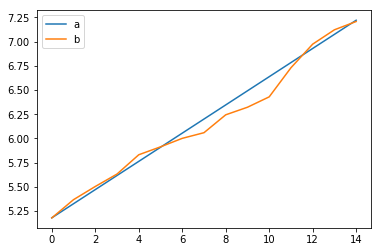

In [79]:
# schooling years
x = np.arange(0, 15)

plt.figure()

# part a
p = reg.params
line_a, = plt.plot(x, p[0] + p[1] * x + p[2] * 40 + p[3] * 40 ** 2,
                  label='a')

# part b
p2 = reg2.params
line_b, = plt.plot(x, p2[x] + p2[16] * 40 + p2[17] * 40 ** 2,
                  label='b')

# plot
plt.legend(handles=[line_a, line_b])

# 1d

(array([5.00e+00, 0.00e+00, 4.00e+00, 1.00e+00, 3.00e+00, 5.00e+00,
        2.70e+01, 2.70e+01, 2.80e+01, 3.78e+02, 1.58e+02, 4.78e+02,
        6.84e+02, 9.49e+02, 6.55e+02, 8.15e+02, 1.03e+03, 6.27e+02,
        3.83e+02, 2.53e+02, 2.01e+02, 1.50e+02, 6.00e+01, 6.60e+01,
        2.90e+01, 8.00e+00, 1.00e+01, 2.00e+00, 1.00e+00, 1.00e+00]),
 array([2.30258509, 2.54635911, 2.79013312, 3.03390713, 3.27768114,
        3.52145516, 3.76522917, 4.00900318, 4.2527772 , 4.49655121,
        4.74032522, 4.98409923, 5.22787325, 5.47164726, 5.71542127,
        5.95919529, 6.2029693 , 6.44674331, 6.69051733, 6.93429134,
        7.17806535, 7.42183936, 7.66561338, 7.90938739, 8.1531614 ,
        8.39693542, 8.64070943, 8.88448344, 9.12825745, 9.37203147,
        9.61580548]),
 <a list of 30 Patch objects>)

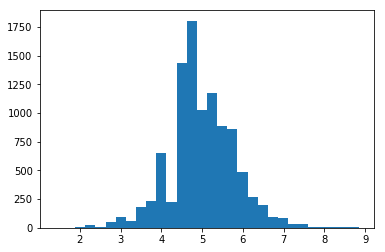

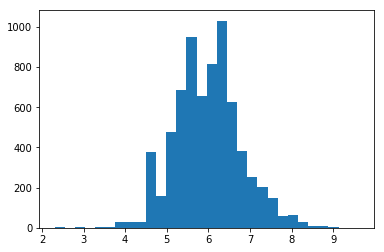

In [80]:
# YRSSCH == 0
plt.figure()
plt.hist(np.log(df[df.YRSSCH == 0].MONTHLY_EARNINGS), bins=30)

# YRSSCH == 8
plt.figure()
plt.hist(np.log(df[df.YRSSCH == 8].MONTHLY_EARNINGS), bins=30)

In [81]:
print(np.log(df[df.YRSSCH == 0].MONTHLY_EARNINGS).describe())
print(np.log(df[df.YRSSCH == 8].MONTHLY_EARNINGS).describe())

count    9969.000000
mean        4.993600
std         0.809577
min         1.386294
25%         4.605170
50%         4.941642
75%         5.480639
max         8.853665
Name: MONTHLY_EARNINGS, dtype: float64
count    7038.000000
mean        5.997210
std         0.804231
min         2.302585
25%         5.438079
50%         5.991465
75%         6.476972
max         9.615805
Name: MONTHLY_EARNINGS, dtype: float64


- Mean and median are higher for the (YRSSCH == 8) group (4.994 vs 5.997, 4.942 vs 5.991).
- Standard deviations are about the same (0.810 vs 0.804).
- Absolute spread is about the same (7.467 vs 7.31322). However, the IQR is higher for the (YRSSCH == 8) group (0.875 vs 1.039), suggesting that the distribution of the (YRSSCH == 8) group is less dense in the middle 50% and more dense in the tails.

# 1e

In [82]:
# construct a new data frame
# filter for observations with age between 20 and 60
# assign observations to cells
# sort
df2 = df\
    .query('AgeInDays >= 20 & AgeInDays <= 60')\
    .assign(subcell=lambda x: (x.YRSSCH * 8 + np.minimum((x.AgeInDays - 20) // 5, 7)).astype('int'))\
    .sort_values(by=['subcell', 'log_earnings'], ascending=True)

# subcells with at least 30 observations
subcells_gte_30 = df2\
    .groupby('subcell')\
    .size().reset_index(name='size')\
    .query('size >= 30')

# compute quantiles
subcells_quantiles = df2\
    .query('subcell in @subcells_gte_30.subcell')\
    .groupby('subcell')\
    .log_earnings\
    .quantile([0.1, 0.25, 0.5, 0.75, 0.9])\
    .reset_index(name='value')\
    .rename(index=str, columns={'level_1': 'q'})

# confidence level
conf_level = 0.05

# compute N, l, j, k
subcells_quantiles = subcells_quantiles\
    .assign(N=lambda x: subcells_gte_30.loc[x.subcell, 'size'].values)\
    .assign(l=lambda x: norm.ppf(1 - conf_level / 2) * np.sqrt(x.N * x.q * (1 - x.q)))\
    .assign(j=lambda x: (np.maximum(1, np.floor(x.N * x.q - x.l)).astype('int')),
            k=lambda x: (np.minimum(x.N, np.ceil(x.N * x.q + x.l)).astype('int')))

# compute confidence intervals
subcells_quantiles['ci0'] = subcells_quantiles.apply(axis=1,
                                                     func=lambda x: df2[df2.subcell == x.subcell].log_earnings.iloc[int(x.j - 1)])
subcells_quantiles['ci1'] = subcells_quantiles.apply(axis=1,
                                                     func=lambda x: df2[df2.subcell == x.subcell].log_earnings.iloc[int(x.k - 1)])

# compute SE
subcells_quantiles = subcells_quantiles\
    .assign(se=lambda x: np.sqrt(x.N * (x.ci1 - x.ci0) ** 2 / 4 / (norm.ppf(1 - conf_level / 2) ** 2)))

# 1f

In [87]:
print(df.MONTHLY_EARNINGS.sample(10))

41577     280
96139     240
12261     200
65220    1962
98160     150
55726     112
1149      240
10368     155
812       300
19729      20
Name: MONTHLY_EARNINGS, dtype: int64


- *MONTHLY_EARNINGS* is not continuously-valued, but discretely-valued. 

In [84]:
print(subcells_quantiles.query('se == 0').se)

3      0.0
121    0.0
140    0.0
170    0.0
175    0.0
178    0.0
200    0.0
240    0.0
280    0.0
433    0.0
444    0.0
Name: se, dtype: float64


- There exist 0 standard error estimates. Since *MONTHLY_EARNINGS* is not continuously-valued, there are observations with same values of *MONTHLY_EARNINGS*, and if they are sufficiently many to cover the whole confidence interval, the resulting standard error estimate will be 0.

# 1g

In [85]:
# compute weights
subcells_quantiles = subcells_quantiles\
    .query('se != 0')\
    .assign(p=lambda x: x.N / len(df2),
            YRSSCH=lambda x: x.subcell // 8,
            AgeInDays=lambda x: (x.subcell % 8) * 5 + 20 + 2.5)\
    .assign(w=lambda x: x.p / (x.se ** 2))

# run WLS for each quantile
reg_quantiles = []
for q in [0.1, 0.25, 0.5, 0.75, 0.9]:
    this_subset = subcells_quantiles.query('q == @q')
    reg_quantiles.append(smf.wls('value ~ YRSSCH + AgeInDays + np.power(AgeInDays, 2)',
                                 data=this_subset,
                                 weights=this_subset.w).fit())

for reg in reg_quantiles:
    print(reg.params['YRSSCH'])

0.12719065059358461
0.12873242478993707
0.14221449916649698
0.16103987296946956
0.15294803447693406


- Coefficient on schooling is higher for higher quantiles; while it is 0.127 for the 10th quantile, it is 0.153 for the 90th quantile.
- Part (a) gave 0.146, and part (b), allowing different intercepts for each schooling year, gave a similar result. However, part (a) and (b) only provide information on mean, and OLS assumes homoscedasticity of the error terms. The results from the quantile regression illustrate that the returns to schooling vary across workers within the same education group, and therefore suggest that homoscedasticity might not hold.

# 1h

- In this problem set, we are interested in analyzing how earnings vary with education in Brazil. Our dataset contains 65,801 rows with data on education, age, monthly earnings, and other variables at an individual level.
- We ran an OLS regression controlling for age, which estimated the coefficient on schooling as 0.146. Allowing different intercepts for each schooling year also produced a similar result. Thus, on average, one extra year of schooling increases monthly earnings approximately by 14.6%.
- However, this OLS only provides information on mean, and it assumes homoscedasticity of the error terms. The results do not necessarily imply that schooling increases earnings uniformly within an education group. It is possible that the earnings gap between low and high income individuals within an education gorup widens as schooling increases.
- One way to look at this possibility is quantile regression. We assigned observations into cells based on schooling and age, estimated conditional quantiles, and ran weighted least squares regression on the conditional quantiles.
- The quantile regression showed that coefficient on schooling is higher for higher quantiles. Therefore, as schooling increases, the earnings gap between low and high income individuals widens within an education group. It also suggests that conditional income distribution might be heteroscedastic. 

# 1i

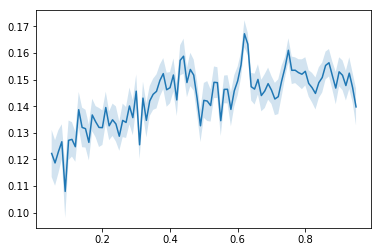

In [86]:
# compute quantiles
subcells_quantiles2 = df2\
    .query('subcell in @subcells_gte_30.subcell')\
    .groupby('subcell')\
    .log_earnings\
    .quantile(np.arange(0.05, 0.96, 0.01))\
    .reset_index(name='value')\
    .rename(index=str, columns={'level_1': 'q'})

# confidence level
conf_level = 0.05

# compute N, l, j, k
subcells_quantiles2 = subcells_quantiles2\
    .assign(N=lambda x: subcells_gte_30.loc[x.subcell, 'size'].values)\
    .assign(l=lambda x: norm.ppf(1 - conf_level / 2) * np.sqrt(x.N * x.q * (1 - x.q)))\
    .assign(j=lambda x: (np.maximum(1, np.floor(x.N * x.q - x.l)).astype('int')),
            k=lambda x: (np.minimum(x.N, np.ceil(x.N * x.q + x.l)).astype('int')))

# compute confidence intervals
subcells_quantiles2['ci0'] = subcells_quantiles2.apply(axis=1,
                                                       func=lambda x: df2[df2.subcell == x.subcell].log_earnings.iloc[int(x.j - 1)])
subcells_quantiles2['ci1'] = subcells_quantiles2.apply(axis=1,
                                                       func=lambda x: df2[df2.subcell == x.subcell].log_earnings.iloc[int(x.k - 1)])

# compute SE
subcells_quantiles2 = subcells_quantiles2\
    .assign(se=lambda x: np.sqrt(x.N * (x.ci1 - x.ci0) ** 2 / 4 / (norm.ppf(1 - conf_level / 2) ** 2)))

# compute weights
subcells_quantiles2 = subcells_quantiles2\
    .query('se != 0')\
    .assign(p=lambda x: x.N / len(df2),
            YRSSCH=lambda x: x.subcell // 8,
            AgeInDays=lambda x: (x.subcell % 8) * 5 + 20 + 2.5)\
    .assign(w=lambda x: x.p / (x.se ** 2))

# run WLS, store coefficient on schooling and its SE
coefs = []
ses = []
for q in np.arange(0.05, 0.96, 0.01):
    this_subset = subcells_quantiles2.query('q == @q')
    this_reg = smf.wls('value ~ YRSSCH + AgeInDays + np.power(AgeInDays, 2)',
                       data=this_subset,
                       weights=this_subset.w).fit()
    coefs.append(this_reg.params['YRSSCH'])
    ses.append(this_reg.bse['YRSSCH'])

# construct a data frame with quantiles, coef on schooling, SE
reg_quantiles2 = pd.DataFrame({'q': np.arange(0.05, 0.96, 0.01),
                               'coef': coefs,
                               'se': ses})

# plot
x = np.arange(0.05, 0.96, 0.01)
plt.figure()
plt.plot(x, reg_quantiles2.coef[((x - 0.05) * 100).astype('int')])
plt.fill_between(x,
                 reg_quantiles2.coef[((x - 0.05) * 100).astype('int')] + norm.ppf(1 - conf_level / 2) * reg_quantiles2.se[((x - 0.05) * 100).astype('int')],
                 reg_quantiles2.coef[((x - 0.05) * 100).astype('int')] - norm.ppf(1 - conf_level / 2) * reg_quantiles2.se[((x - 0.05) * 100).astype('int')],
                 alpha=0.2)


- Returns to schooling is relatively lower for lower income groups, and it increases as one moves up in the income distribution. However, roughly around at the median, it starts to fluctuate up and down instead of increasing.